# Сборный проект. Анализ рынка видеоигр

В данном проекте нам предстоит проанализировать данные о рынке видеоигр за несколько десятилетий применительн к продажам в разных регионах мира, игровой платформе, оценке пользователей, критиков и возрастному рейтингу.

Конечная цель:  ***дать обоснованный прогноз на какие игры сделать ставку в последующем году, чтобы правильно распределить рекламный бюджет.***

Для достижении данной цели, нам предстоит решить следующие задачи:

1) Предобработать данные - обработать ошибки, заполнить пропуски, форматы

2) Отобрать валидные данные по актуальному период, провести дополнительные расчет

3) Провести исследовательский анализ данных - определить долю жанров в рынке, выделить 

4) Определить портрет пользователя для каждого региона

5) Провести статистический анализ различий двух разных платформ и жанров.


**Импортируем необходимые инструменты для работы с данными и исходный набор данных:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st


game_data = pd.read_csv('/datasets/games.csv', encoding='utf-8')

## Описание данных

Столбцы:

- Name — название игры

- Platform — платформа

- Year_of_Release — год выпуска

- Genre — жанр игры

- NA_sales — продажи в Северной Америке (миллионы проданных копий)

- EU_sales — продажи в Европе (миллионы проданных копий)

- JP_sales — продажи в Японии (миллионы проданных копий)

- Other_sales — продажи в других странах (миллионы проданных копий)

- Critic_Score — оценка критиков (максимум 100)

- User_Score — оценка пользователей (максимум 10)

- Rating — рейтинг от организации ESRB

In [2]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В исходном датасете поля заполнены неравномерно - имеются пропуски, однако по большинству полей имеются сведения.

Есть поля, в которых данные имеют несоответствующий по смыслу тип хранения.

Выведем первые 10 строк на экран

In [3]:
game_data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#Проверка на дубликаты

game_data.duplicated().sum()

0

Промежуточные итоги по набору данных

- Всего имеется 16715 наблюдений, максимально количество пропущенных значений по столбцу `Сritic Score`

- Дубликаты отсутствуют

- Все столбцы должны быть переведены в нижний регистр

- Данные в столбце `user` должны быть принудительно переведены в числовое значение



## Предобработка

Приведем заголовки к нижнему регистру для удобства:

In [5]:
game_data.columns = map(str.lower, game_data.columns)

In [6]:
game_data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

***Далее, приведем данные к нужным типам, чтобы в получить их описание:***

Предварительно нужно оценить количество tbd в столбце с рейтингами:

In [7]:
tbd_cr = len(game_data[game_data['critic_score'] == 'tbd'])
tbd_u = len(game_data[game_data['user_score'] == 'tbd'])
tbd_esrb = len(game_data[game_data['rating'] == 'tbd'])

print(f'В столбце рейтинга критиков неопределено: {tbd_cr} игр\n\
В столбце рейтинга игроков неопределено: {tbd_u} игр\n\
В столбце рейтинга ESRB неопределено: {tbd_esrb} игр')

В столбце рейтинга критиков неопределено: 0 игр
В столбце рейтинга игроков неопределено: 2424 игр
В столбце рейтинга ESRB неопределено: 0 игр


/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Итак, только в рейтинге игроков у нас есть игры, которые ещё предстоит оценить. Мы предлагаем заменить его на NaN, используя принудительное приведение к типам

In [8]:
# год - целое число, для наших задач перевод в дату - необязателен, однако получить NaN если там строки - имеет смысл
game_data['year_of_release'] = pd.to_numeric(game_data['year_of_release'],\
                                             downcast='unsigned', errors='coerce')

# На случай, если не только из пропущенных значений тип object приведем тип к числовому, нечисловые заменятся на NaN
game_data['user_score'] = pd.to_numeric(game_data['user_score'],\
                                             errors='coerce')


In [9]:
tbd_u = len(game_data[game_data['user_score'] == 'tbd'])
tbd_u

0

Все неопределенные оценки игроков заменены на NaN

In [10]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [11]:
game_data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165,1.500006
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


Необходимые операции:

- Значения оценок пользователей и критиков имеют разную размерность, которая может быть линейно стандартизирована при помощи коэффициента приведения (10) -> приведение размерности

- Для 25% (или даже больше)  игр значение продаж оказалось 0, соотсветственно, для целей нашего анализа такие наблюдения не подойдут -> подсчет -> отбор только по играм с выручкой

***Комментарий:***

***На самом деле нужно посмотреть как изменится этот показатель для "валидных" времени игр. Да и сами плохие игры - тоже пример в какие авантюры ввязываться не стоит***

- В имеющемся наборе данных имеются данные почти за 40 лет существования игровой индустрии, для целей нашего анализа, мы считаем правильным оставить только данные, начиная с 2001 года, когда PC и игровые приставки стали массовыми предметами быта, и когда игровая индустрия стала похожа на текущую (с онлайн и офлайн версиями). Более того, сами жанры за такой период времени серьезно изменились. -> отбор по играм моложе 16 лет с релиза

In [12]:
# приводим оценки критиков к шкале от 0 до 10 (удобно для дальнейших диаграмм рассеяния)

game_data['critic_score'] = game_data['critic_score']/10

In [13]:
game_data['critic_score'].describe()

count    8137.000000
mean        6.896768
std         1.393816
min         1.300000
25%         6.000000
50%         7.100000
75%         7.900000
max         9.800000
Name: critic_score, dtype: float64

Произведем вычисление суммарных (глобальных) продаж для упрощения отбора объектов.

In [14]:
game_data['global_sales'] = game_data[['na_sales','eu_sales','jp_sales','other_sales']].apply(np.sum,axis=1)

**Опишем новый столбец:**

In [15]:
game_data['global_sales'].describe()

count    16715.000000
mean         0.533396
std          1.548261
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: global_sales, dtype: float64

## Исследовательский анализ данных



Для того, чтобы оценить правильность нашего выбора периода оценим количество игр по годам с помощью графика зависимости количества реализованных игр по годам:

In [16]:


game_data.pivot_table(index='year_of_release', values = 'global_sales', aggfunc={'count','sum'})

,count,sum
year_of_release,,
1980.0,9,11.38
1981.0,46,35.68
1982.0,36,28.88
1983.0,17,16.80
1984.0,14,50.35
1985.0,14,53.95
1986.0,21,37.08
1987.0,16,21.70
1988.0,15,47.21


По данной сводной таблице видно, что до 1994 года в год выпускалось менее 100 игр, а после 2001-го около 500 и более. Причем, данные за последние 5 лет больше похожи на начало 2000-х (по кол-ву и продажам), чем на 2-ую пятилетку прошлого десятилетия.

**Теперь посмотрим на распределение по платформам**

In [17]:
def agg_plot(data, idn, val, func, reset):
    grouped = data.pivot_table(index= idn, values = val, aggfunc = func)
    
    if reset:
        grouped.reset_index(inplace= True)
        
    return grouped

In [18]:
# Агрегируем данные по платформам
platform_group = agg_plot(game_data,'platform','global_sales',{'count',np.sum}, True)# game_data.pivot_table(index=['platform'],\
                                       
platform_group.sort_values(by='sum', ascending=False).head(10)

,platform,count,sum
16,PS2,2161,1255.77
28,X360,1262,971.42
17,PS3,1331,939.65
26,Wii,1320,907.51
4,DS,2151,806.12
15,PS,1197,730.86
6,GBA,822,317.85
18,PS4,392,314.14
19,PSP,1209,294.05
13,PC,974,259.52


In [19]:
# отберем те платформы, на которых выпускалось больше 259 млн. суммарно проданных копий игр на платформе - первые 10

platform_names = platform_group[platform_group['sum'] > 250]['platform'].unique()
platform_names

array(['3DS', 'DS', 'GB', 'GBA', 'NES', 'PC', 'PS', 'PS2', 'PS3', 'PS4',
       'PSP', 'Wii', 'X360', 'XB'], dtype=object)

In [20]:
# Агрегируем данные по продажам по годам
platform_years = agg_plot(game_data.query('platform in @platform_names'),\
                          ['platform','year_of_release'], 'global_sales',
                          {np.sum}, True)

platform_years.columns=['Platform','Year','Total_sales']

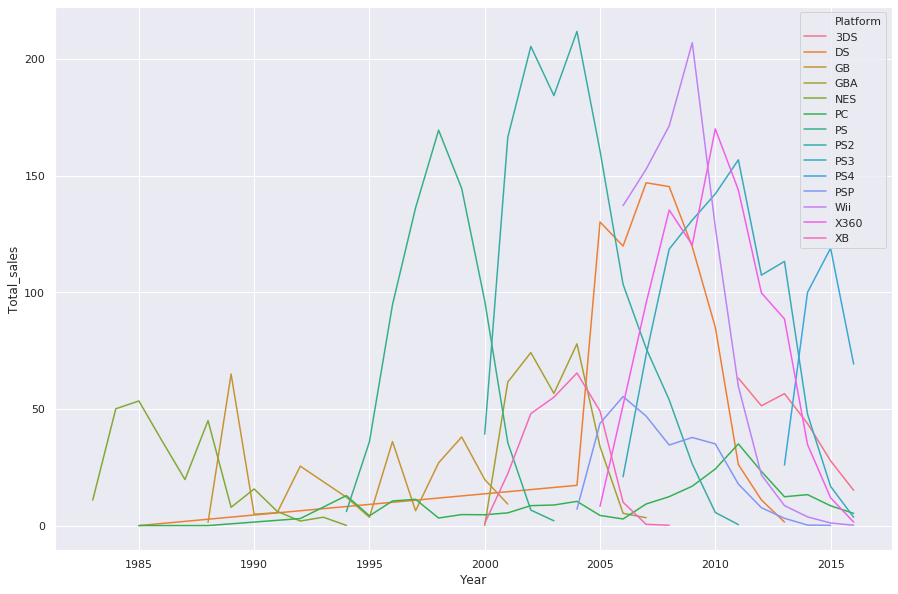

In [21]:
sns.set()
plt.figure(figsize=(15,10))
ax = sns.lineplot(x="Year", y="Total_sales", hue="Platform",
                  data=platform_years)

In [22]:
# определяем средний срок существования популярной платформы
np.std(platform_years['Year'])

8.347575426289128

Выводы краткий вывод:

- Платформы рождаются и умирают... Если всматриваться детально, то можно заметить, что в последние 20 лет остаются только несколько франшиз в игровых платформах -  **Nintendo(Game Boy & DS), Microsoft (Xbox), Sony(PS), PC**.

- Интересно, что суммарные продажи ***падают*** в последние годы для всех платформ (проверим для актуального периода)

- Средний срок продолжительности существования платформы - 8 лет (стандартное отклонение это выражает). И примерно за 2 года до конца жизни данной платформы, появляется следующая. 

- Платформа может существовать и дольше (например, GB) и PC (из-за того, что платформа дифференцирована и архитектурная основа -"железо"- может постоянно обновляться).

- В описании к данным, указанно, что информация за 2016 год могла быть неполной, соответственно, мы должны ориентироваться на рост в 2015-м году применительно к продажам.

***В связи с тем, что, начиная с 2000-х годов существуют лишь несколько крупных брендов и существованием платформы, которые обновляются регулярно (раз в 8 лет), мы считаем приемлимым взять данные за последние 6 лет, то есть начиная с 2010 года***

## Анализ по валидным данным за последние 6 лет

**Произведем отбор в новый датафрейм игр с заданными условиями по времени:**

In [23]:
# Дополнительно используем метод copy с параметром deep = True, чтобы беспрепятственно работать
# При более высоком объеме набора данных, нам бы пришлось использовать drop, чтобы не перегружать память компьютера/сервера хранением
games = game_data[game_data['year_of_release'] > 2010].copy(deep=True)


In [24]:
# Теперь можно год перевести в int (ранее метод не работал по причине наличия пропущенных значений
# float может хранить NaN, int - нет

games['year_of_release'] = games['year_of_release'].astype(int)

In [25]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,global_sales
count,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,1812.000000,2032.000000,4022.000000
mean,2013.092989,0.206305,0.166532,0.061077,0.051942,7.127428,6.633022,0.485855
std,1.776160,0.570441,0.482864,0.220248,0.155342,1.309585,1.541293,1.219503
min,2011.000000,0.000000,0.000000,0.000000,0.000000,1.300000,0.200000,0.010000
25%,2011.000000,0.000000,0.000000,0.000000,0.000000,6.400000,5.800000,0.040000
50%,2013.000000,0.040000,0.030000,0.000000,0.010000,7.400000,7.000000,0.130000
75%,2015.000000,0.170000,0.130000,0.050000,0.040000,8.100000,7.800000,0.407500
max,2016.000000,9.660000,9.090000,4.390000,3.960000,9.700000,9.300000,21.050000


In [26]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4022 entries, 16 to 16714
Data columns (total 12 columns):
name               4022 non-null object
platform           4022 non-null object
year_of_release    4022 non-null int64
genre              4022 non-null object
na_sales           4022 non-null float64
eu_sales           4022 non-null float64
jp_sales           4022 non-null float64
other_sales        4022 non-null float64
critic_score       1812 non-null float64
user_score         2032 non-null float64
rating             2314 non-null object
global_sales       4022 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 408.5+ KB


**Краткий вывод по этой части:**

- Были обработаны столбцы и приведены к нужным типам (допустимо)

- Был сформирован рабочий набор данных по временному периоду (после 1999-го года)

- Мы оставили наблюдения с нулевым значением продаж, чтобы дополнительно оценить риски в рамках жанра или платформы

**Построим корреляционную тепловую карту, чтобы оценить меры сопряженности признаков между собой:**

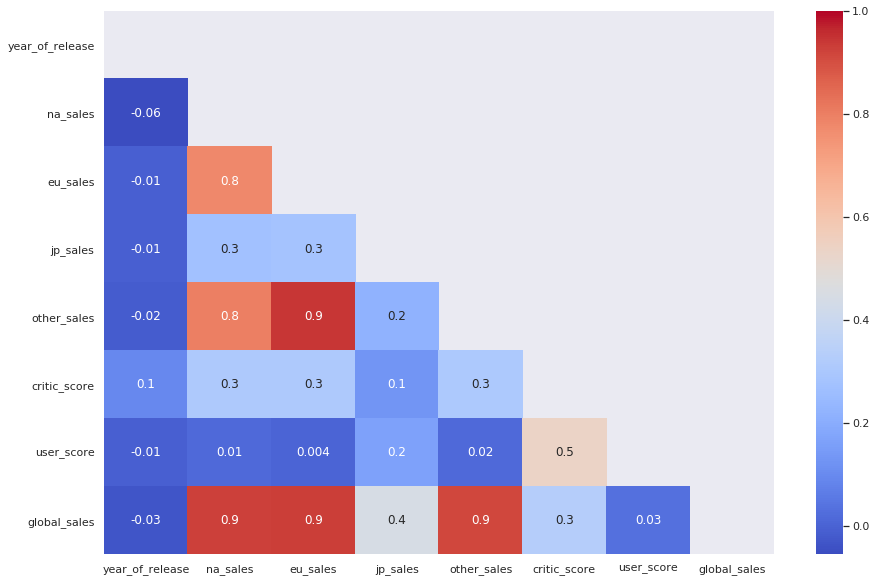

In [27]:
plt.figure(figsize=(15,10))

# по умолчанию мера корреляции критерий Xi^2 по Пирсону, его мы и используем. Жалко, что нет Крамера...
matrix = np.triu(games.corr())
sns.heatmap(games.corr(), annot=True, fmt='.1g', cmap= 'coolwarm', mask = matrix)

Из данной тепловой карты видно, что:

- Самая очевидную связь отдельных продаж с глобальными продажами. Этот аспект можно игнорировать.

- Продажи по Европе и Америке **cильно коррелируют** это может означать, что менталитет и запросы игроков в этих регионах совпадают

- Также данные регионы имеют немного ***более слабую связь*** с регионами other (предположительно - Океания, Азия и др.)

- **Слабая связь** между регионом Японии и Европы с Америкой. Причем судя по всему японские игроки, обладают специфичными характеристиками, потому что продажи в японии имеют лишь среднюю связь с глобальными. Нужно будет изучить этот рынок более подробно.

- **Средняя связь** между оценкой критиков и игроков

- **Отсутствие явной связи между**

- ***Слабая отрицательная связь*** между годом выхода игры и оценкой игры, то есть оценки игроков могут незначительно уменьшаться от года к году

**Очевидно, что  наш анализ необходимо дополнить графиками, сводными таблицами и статистиками для более глубокого понимания закономерностей между признаками. Продолжим:**

###  Изучение популярности платформ

**Агрегируем данные по игровым платформа к выпущенным играм и глобальным продажам**

In [28]:
games.pivot_table(index = 'platform',values='global_sales', \
                  aggfunc= {'count','sum'}).sort_values(by='sum',ascending=False)

,count,sum
platform,,
PS3,708,445.57
X360,498,380.38
PS4,392,314.14
3DS,512,257.81
XOne,247,159.32
PC,389,97.68
Wii,197,95.02
WiiU,147,82.19
PSV,429,53.81


Построим график зависимости продаж внутри платформы для нашего актуального периода (8 лет):

In [29]:
valid_platform = agg_plot(games, ['platform','year_of_release'], ['global_sales'], {'count', np.sum}, True)
valid_platform.columns = ['platform','year','count','sum']


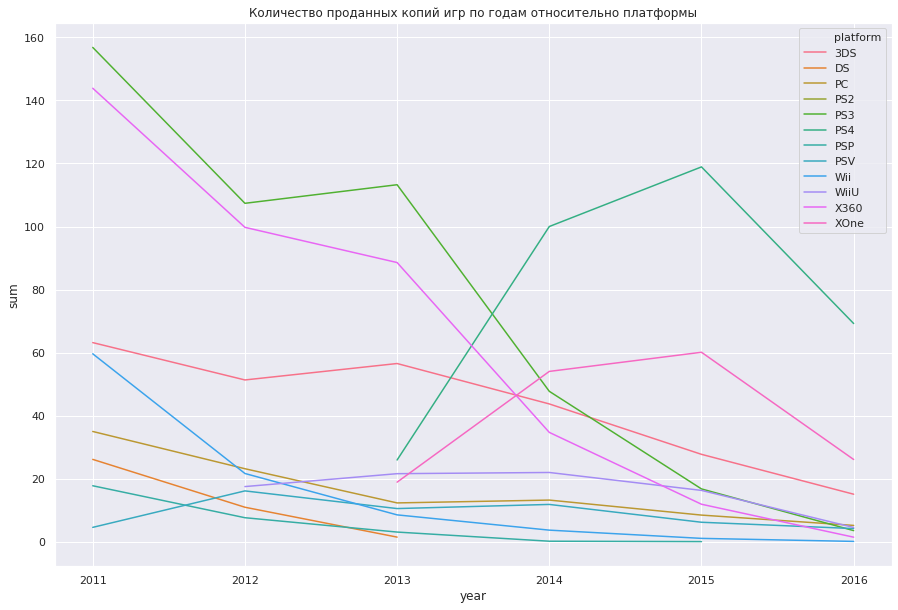

In [30]:
sns.set()
plt.figure(figsize=(15,10))
plt.title('Количество проданных копий игр по годам относительно платформы')
plt.xlabel('Год')
plt.ylabel('млн.копий')

valid_platform = agg_plot(games, ['platform','year_of_release'], ['global_sales'], {'count', np.sum}, True)
valid_platform.columns = ['platform','year','count','sum']

ax = sns.lineplot(x="year", y='sum', hue="platform",
                 data=valid_platform)


Ранее, мы строили похожий график и тогда получили схожие результаты - в 2016-м году - все платформы испытали спад по продажам игр - обусловлено возможной неполнотой информации за этот год.

В 5 лидеров по продажам в 2016- м году были PS4, XOne, 3DS, PC, WiiU

Четко видно, что в 12-13-м году появились новые платфоррмы - **WiiU, PS4, XOne**. PC держится на стабильно низком уровне, 3DS - имеет высокое значение по продажам, но скорее доживает свой цикл. Wii, PSP и DS умерли в этот период.

 
**Изучим сколько игр выпускалось для каждой платформ в год:***

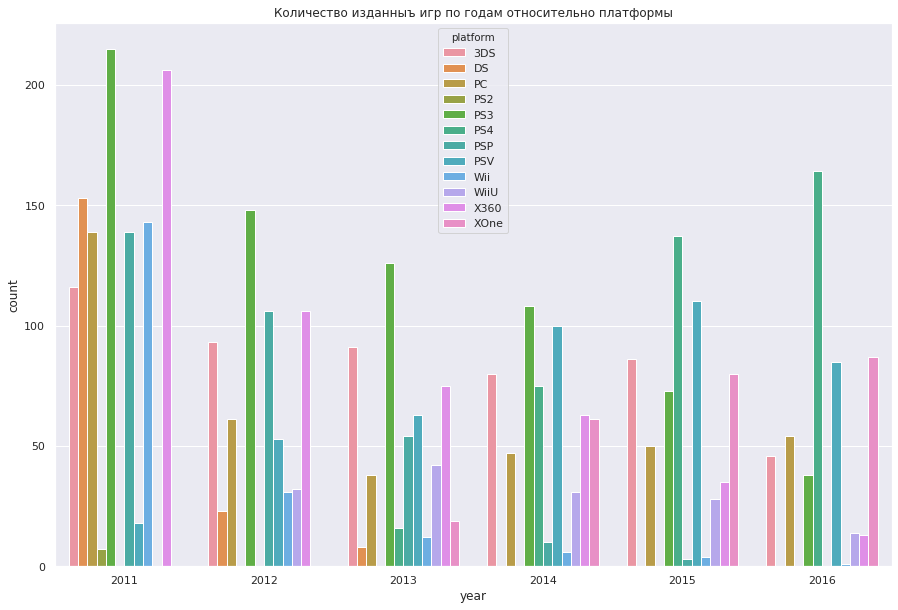

In [31]:
sns.set()
plt.figure(figsize=(15,10))
plt.title('Количество изданныъ игр по годам относительно платформы')
plt.xlabel('Год')
plt.ylabel('млн.копий')

ax = sns.barplot(x="year", y="count", hue="platform", data=valid_platform)

Количество выпускаемых игры возрастает для платформ PS4, XOne, PC, растет протяжении последних трех лет, значит платформы находятся в активной фазе своего жизненного цикла.

**Выразим данные при помощи таблиц:**

In [32]:
platform_14 = valid_platform[valid_platform['year'] == 2014].sort_values(by='sum', ascending=False)
platform_15 = valid_platform[valid_platform['year'] == 2015].sort_values(by='sum', ascending=False)
platform_16 = valid_platform[valid_platform['year'] == 2016].sort_values(by='sum', ascending=False)



In [33]:
# Теперь объединим данные за последние 3 года 
platform_3y = (platform_14[['platform','count','sum']].merge(\
                                                           platform_15[['platform','count','sum']], \
                                                           on = 'platform', how='inner'\
                                                           )).merge(
                                                            platform_16[['platform','count','sum']], \
                                                            on='platform',how='inner')
platform_3y.columns = ['platform','count_14','sales_14','count_15','sales_15','count_16','sales_16']
platform_3y

,platform,count_14,sales_14,count_15,sales_15,count_16,sales_16
0,PS4,75,100.00,137,118.90,164,69.25
1,XOne,61,54.07,80,60.14,87,26.15
2,PS3,108,47.76,73,16.82,38,3.60
3,3DS,80,43.76,86,27.78,46,15.14
4,X360,63,34.74,35,11.96,13,1.52
5,WiiU,31,22.03,28,16.35,14,4.60
6,PC,47,13.28,50,8.52,54,5.25
7,PSV,100,11.90,110,6.25,85,4.25
8,Wii,6,3.75,4,1.14,1,0.18


In [34]:
# мучительный подсчет цепных относительных показателей
platform_3y['rel_sales_14-15'] = (platform_3y['sales_15']/ platform_3y['sales_14']*100).apply(np.ceil)
platform_3y['rel_sales_15-16'] = (platform_3y['sales_16']/ platform_3y['sales_15']*100).apply(np.ceil)
platform_3y['rel_games_14-15'] = (platform_3y['count_15']/ platform_3y['count_14']*100).apply(np.ceil)
platform_3y['rel_games_15-16'] = (platform_3y['count_16']/ platform_3y['count_15']*100).apply(np.ceil)

# приводим в надлежащий вид табличку
platfrom_3y = platform_3y[['platform','count_14','sales_14',\
                          'rel_games_14-15','rel_sales_14-15',\
                          'count_15','sales_15','rel_games_15-16',\
                          'rel_sales_15-16','count_16','sales_16']]

In [35]:
platform_3y = platfrom_3y.sort_values(by='sales_16',ascending = False)
platform_3y

,platform,count_14,sales_14,rel_games_14-15,rel_sales_14-15,count_15,sales_15,rel_games_15-16,rel_sales_15-16,count_16,sales_16
0,PS4,75,100.00,183.0,119.0,137,118.90,120.0,59.0,164,69.25
1,XOne,61,54.07,132.0,112.0,80,60.14,109.0,44.0,87,26.15
3,3DS,80,43.76,108.0,64.0,86,27.78,54.0,55.0,46,15.14
6,PC,47,13.28,107.0,65.0,50,8.52,108.0,62.0,54,5.25
5,WiiU,31,22.03,91.0,75.0,28,16.35,50.0,29.0,14,4.60
7,PSV,100,11.90,111.0,53.0,110,6.25,78.0,68.0,85,4.25
2,PS3,108,47.76,68.0,36.0,73,16.82,53.0,22.0,38,3.60
4,X360,63,34.74,56.0,35.0,35,11.96,38.0,13.0,13,1.52
8,Wii,6,3.75,67.0,31.0,4,1.14,25.0,16.0,1,0.18


**Краткий вывод:**

- Абсолютными лидерами по количеству выпускаемых играм и проданным копиям являются - PS4, XOne, 3DS - они встречаются в пятерке лидеров все 3 последних года. 

- WiiU отличается от остальных платформ сравнительно небольшим количеством продаж и стремительным падением. Однако испытыла падение продаж 

- PC также оказалась в 5 лидеров, количество выпускаемых игр для этой платформы также стабильно возрастает. 

- Аутсайдерами нашего рейтинга оказались - PSV, PS3, X360, Wii - платформы устарели и отжили свой цикл

Как уже было сказано, 3DS стабильно падает последние годы, по таблице видно, что темп остается на уровне 50% по играм и продажам.


***Фаворитами являются таким образом - PS4, XOne, PC, а WiiU, 3DS - является достаточно рискованной для серьезных трат (мало игр для одной и падение для другой)***

Построим для каждой из этих платформ диаграмму boxplot:

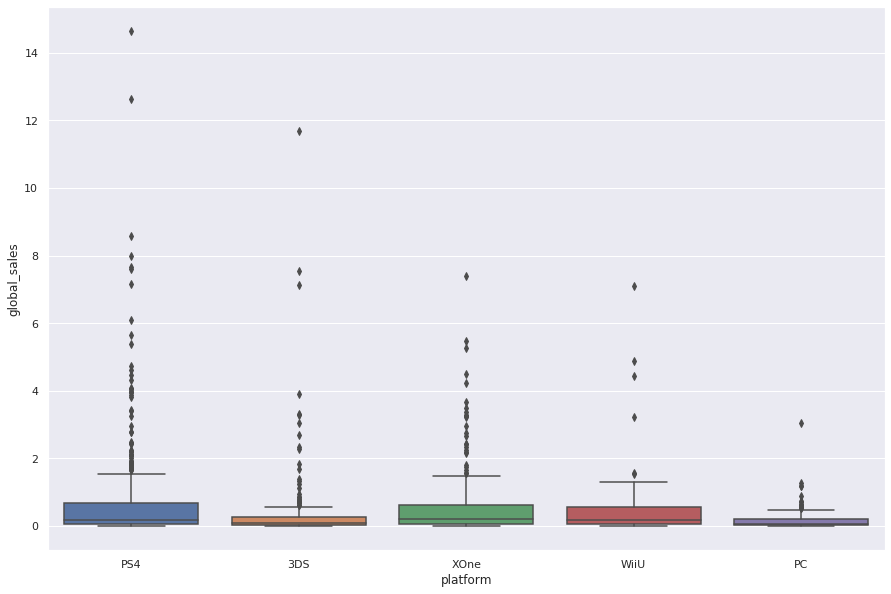

In [36]:
plt_names = platform_3y.iloc[:5,0].tolist()

plt.figure(figsize=(15,10))
ax = sns.boxplot(x="platform", y="global_sales", data=games.query('platform in @plt_names and year_of_release > 2013'))

Это тот случай, когда выбросы - это хорошо :)

- Выбивающиеся значения - это игры, которые были настолько популярны, что не уложили в обычное количество продаж.

- По точкам можно заметить, что больше всего таких сверх-успешных проектов выпущено на PS4, 3DS, XOne , остальные платформы имеют меньшую плотность плотность, одна у них тоже есть своих хиты.

- По границе в Q3+1.5*IQR наиболее популярные платформы - PS4, XOne, WiiU

Таким образом, из нашей фаворитов мы выделяем 3 безопасных платформы - PS4, XOne, WiiU. 3DS и PC - занимают свою нишу.

## Поиск зависимости между оценками и продажами

### на примере Playstation 4

Отберем данные по игровой платформе и построим график рассеяния продаж игр от оценки критиков

In [37]:
ps4_data = games.query('platform == "PS4"')

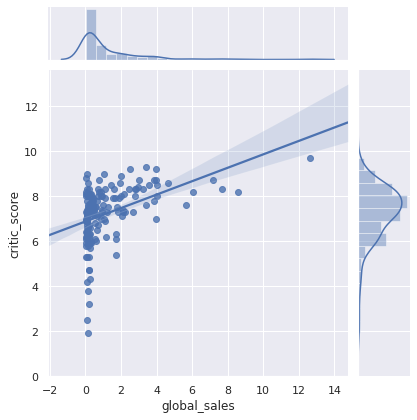

In [38]:
ax = sns.jointplot(x="global_sales", y="critic_score",\
                   kind="reg", data=ps4_data[ps4_data['year_of_release'] < 2016])

In [39]:
ps4_data[ps4_data['year_of_release'] < 2016][['critic_score','global_sales']].corr()

,critic_score,global_sales
critic_score,1.000000,0.431848
global_sales,0.431848,1.000000


Положительный наклон прямой показывает сонаправленность векторов признаков, то есть увеличение одного признака (оценок критиков) влечет за собой увеличение другого (глобальных продаж).

Корреляция средняя

**Изучим отношение между оценкой юзеров и продажами:**

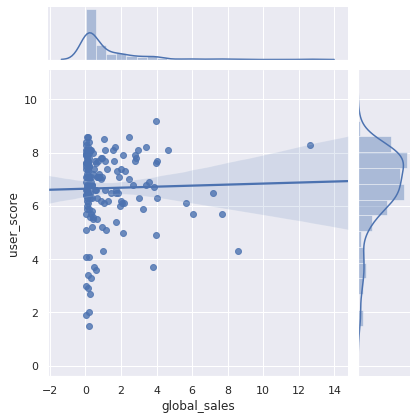

In [40]:
ax = sns.jointplot(x="global_sales", y="user_score",\
                   kind="reg", data=games.query('platform == "PS4" and year_of_release <2016'))

In [41]:
ps4_data[ps4_data['year_of_release'] < 2016][['user_score','global_sales']].corr()

,user_score,global_sales
user_score,1.000000,0.024231
global_sales,0.024231,1.000000


Прямая почти горизонтальная, значит корреляци должна отсутстсвовать, что подтверждает посчитанный коэффициент корреляции. Связь очень слабая

**А что происходит с другими платформами?**

<Figure size 1440x1080 with 0 Axes>

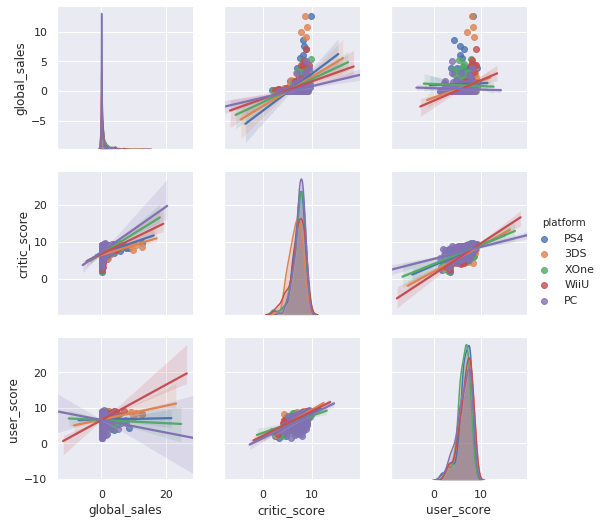

In [42]:
sns.set()
plt.figure(figsize=(20,15))
ax = sns.pairplot(games.query('platform in @plt_names and year_of_release <2016')[['platform',\
                                                    'global_sales','critic_score','user_score']],kind='reg' ,hue="platform")

plt.show()

Как мы видим оценки игроков в большей степени актуальны для продаж игр на платформы WiiU, 3DS, оценки критиков являются более общей мерой успеха игры

### А что с Европой?

Посчитаем сопряженность признаков для Европейских продаж, на аудиторию которой мы в основном и ориентируемся.

In [43]:
ps4_data[ps4_data['year_of_release'] < 2016][['user_score','eu_sales']].corr()

,user_score,eu_sales
user_score,1.000000,-0.001902
eu_sales,-0.001902,1.000000


In [44]:
ps4_data[ps4_data['year_of_release'] < 2016][['critic_score','eu_sales']].corr()

,critic_score,eu_sales
critic_score,1.000000,0.370752
eu_sales,0.370752,1.000000


**Связь получилась менее значительной, чем в случае для глобального рынка**

Разбитые по платформам диаграммы рассеивания отличаются для разных платформ. Для некоторых платформ (3DS, PS4, WiiU) видно, что высокие оценки критиков сопряжены, однако сила этой связи - невелика.

Итак, мы не можем сказать, что оценка игры серьезно влияет на продажи по всему миру, однако есть средне-слабая корреляция между играми по оценке критиков. Значит, нужно найти ещё другие факторы, которые будут определять успешность игры на том или ином рынке. 

### Оценим распределение игр по жанрам

In [45]:
agg_genre = agg_plot(games, 'genre', 'global_sales',\
                     {'count', np.sum}, True).sort_values(by='sum', ascending = False)
agg_genre.head()

,genre,count,sum
0,Action,1269,557.80
8,Shooter,329,402.91
7,Role-Playing,465,245.63
10,Sports,389,237.15
3,Misc,375,139.42


Text(0, 0.5, 'млн. проданных копий')

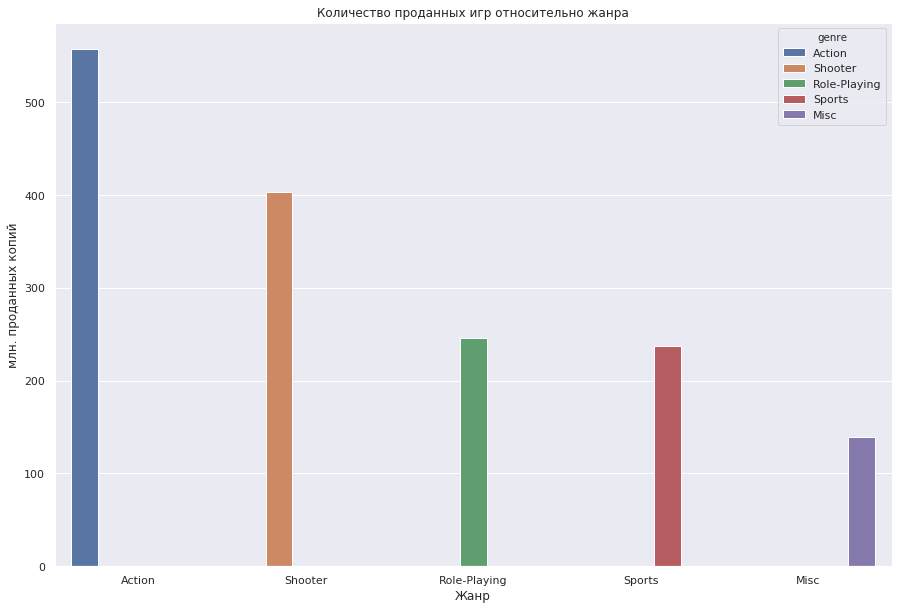

In [46]:
plt.figure(figsize=(15,10))
plt.title('Количество проданных игр относительно жанра')


ax = sns.barplot(x="genre", y="sum", hue="genre", data=agg_genre.iloc[:5,:])

plt.xlabel('Жанр')
plt.ylabel('млн. проданных копий')

Данный график проиллюстрировал нам ТОП-5 жанров видеоигр.

**На данном этапе мы выделили общие закономерности для глобального рынка игровой индустрии:**

- Каждая платформа существует пока на неё выпускают и продают новые игры. Среди срок существования игровой платформы - 8 лет

- Существуют такие платформы, как PC и GB (уже закончил), которые живут дольше, однако имеют существенно меньшую долю рынка

- Топ-5 популярных платформ в 2016-м году -  PS4, XOne, WiiU, Nintendo 3DS (в конце цикла), PC (вне категорий)

- Коммерческая успешность видеоигры слабо зависит от её оценок игроками и критиками

- Топ-5 самых популярных жанров включает в себя: приключения, шутеры, RPG, спорт и смешанного жанра

Далее, нам предстоит провести общий анализ на региональных рынках.

## Выявление закономерностей внутри сегментов клиентов

Выделим самые популярные платформы внутри каждого регионального рынка видеогр. Для этого напишем функцию (и даже вызовем ранее написанный метод)

In [47]:
def get_top(base, y_lim, market, indexer, lim):
    year = y_lim
    agg_segment = agg_plot(games[games['year_of_release'] >= y_lim], base, market,\
                     {'count', np.sum}, indexer).sort_values(by='sum', ascending = False)
    agg_segment.columns = ['games','volume']
    agg_segment_volume = np.sum(agg_segment['volume'])
    agg_segment['part_to_all,%'] = (agg_segment['volume'] / agg_segment_volume)*100
    return agg_segment.iloc[:lim,:]

## Европейский рынок

### Истинно европейская платформа

Посмотрим на долю рынка игр под каждую платформу за 3 и 6 лет.

In [48]:
top_plat_eu6 = get_top('platform', 2011, 'eu_sales', False, 5)
top_plat_eu6

,games,volume,"part_to_all,%"
platform,,,
PS3,708,163.10,24.350916
PS4,392,141.09,21.064811
X360,498,117.10,17.483092
3DS,512,61.27,9.147643
PC,389,56.70,8.465340


Самый большой объем продаж пришелся на PS3, следующий на её потомка. Далее, Xbox 360, 3DS и персональные компьютеры.

In [49]:
top_plat_eu3 = get_top('platform', 2014, 'eu_sales', False, 5)
top_plat_eu3

,games,volume,"part_to_all,%"
platform,,,
PS4,376,130.04,48.041968
XOne,228,46.25,17.086597
PS3,219,25.54,9.435496
PC,151,17.97,6.638836
3DS,212,16.12,5.955372


А вот за последние 3 года положение дел изменилось. Абсолютным доминатом по продажам стала платформа PS4, следующая по популярности платформа имеет долю меньше почти в 3 раза.

### Лучшая игра для джентельменов

**Рассмотрим различные жанры по популярности среди европейских игроков за 6 лет:**

In [50]:
top_gen_eu6 = get_top('genre', 2011, 'eu_sales', False, 5)
top_gen_eu6

,games,volume,"part_to_all,%"
genre,,,
Action,1269,199.12,29.728721
Shooter,329,148.02,22.099464
Sports,389,88.48,13.210111
Role-Playing,465,62.30,9.301423
Racing,180,40.58,6.058615


**И за 3 года:**

In [51]:
top_gen_eu3 = get_top('genre', 2014, 'eu_sales', False, 5)
top_gen_eu3

,games,volume,"part_to_all,%"
genre,,,
Action,619,74.68,27.589774
Shooter,128,65.52,24.205704
Sports,161,45.73,16.894488
Role-Playing,221,28.17,10.407123
Racing,69,14.13,5.220186


Краткий вывод:

- Европейские игроки предпочитают покупать эксклюзивы, которые отбирает для себя Sony под свои платформы

- Самая популярная платформа - PS3 (6 лет) и её преемница Playstation 4 - абсолютный лидер по доле рынка видеоигр (48%) за послдение 3 года.

- Следующей по популярности является XOne, отдавшая свои позиции PS3, а также PC, которая сместила 3DS с 4-го на 5-ое место

- Доли продаж по жанрам относительно стабильны за последние 3 и 6 лет

- ТОП-5 рынка заняли видеоигры из жанров - Action(27%), Shooter	(24%), Sports(17%), Role-Playing(10,4%), Racing (5%). 

- Хорошая игра для игроков из Европы - эксклюзив под PS4 в жанре Action, Shooter или Sports

## Северо-американский рынок

### Платформа от американцев американцам

**Объем рынка игр для платформ за последние 6 лет:**

In [52]:
top_plat_na6 = get_top('platform', 2011, 'na_sales', False, 5)
top_plat_na6

,games,volume,"part_to_all,%"
platform,,,
X360,498,226.80,27.333205
PS3,708,168.26,20.278153
PS4,392,108.74,13.104994
XOne,247,93.12,11.222522
3DS,512,82.65,9.960712


**Объем рынка игр для платформ за последние 3 года:**

In [53]:
top_plat_na3 = get_top('platform', 2014, 'na_sales', False, 5)
top_plat_na3

,games,volume,"part_to_all,%"
platform,,,
PS4,376,98.61,34.714497
XOne,228,81.27,28.610153
X360,111,28.30,9.962684
3DS,212,22.64,7.970147
PS3,219,22.05,7.762445


Лидером за 6 лет была платформа Xbox360, за ней PS3 (с отрывом в 7%) и PS4 (такой же отрыв)

За последние 3 года большую часть рынка заняли приставки последнего поколения за ними меньшую долю делят приставки прошлого поколения

**За последние 6 лет:**

In [54]:
top_gen_na6 = get_top('genre', 2011, 'na_sales', False, 5)
top_gen_na6

,games,volume,"part_to_all,%"
genre,,,
Action,1269,230.92,27.829734
Shooter,329,194.43,23.432077
Sports,389,108.70,13.100174
Role-Playing,465,83.78,10.096895
Misc,375,69.69,8.398814


### Старый и Новый свет сошлись в предпочтениях

**TOP-5 жанров за последние 3 года:**

In [55]:
top_gen_na3 = get_top('genre', 2014, 'na_sales', False, 5)
top_gen_na6

,games,volume,"part_to_all,%"
genre,,,
Action,1269,230.92,27.829734
Shooter,329,194.43,23.432077
Sports,389,108.70,13.100174
Role-Playing,465,83.78,10.096895
Misc,375,69.69,8.398814


Краткий вывод:

- Американские игроки предпочитают покупать эксклюзивы, которые отбирает для себя Sony под свои платформы

- Самая популярная платформа за 6 лет - Xbox360, однако последние 3 года вперед вышла приставка от Sony - PS4 (35%), следом - XOne (29.5%)

- За последние 3 года большую часть рынка делят между собой PS4 & XOne (62%), следом за ним с долей до 10% -

- Доли продаж по жанрам стабильны за последние 3 и 6 лет

- ТОП-5 рынка заняли видеоигры из жанров - Action(28%), Shooter	(24.5%), Sports(13%), Role-Playing(10,4%), Misc (8%). 

- Хорошая игра для игроков из Америки - игры для PS4 и XOne в жанре Action, Shooter или Sports


<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

В том числе каждый расчет можно было бы визуализировать с помощью круговых диаграмм. 

</div>

## Японский рынок

### Мобильный консерватизм

**Объем игр для разных платформ за 6 лет:**

In [56]:
top_plt_jp6 = get_top('platform', 2011, 'jp_sales', False, 5)
top_plt_jp6

,games,volume,"part_to_all,%"
platform,,,
3DS,512,100.62,40.960716
PS3,708,49.39,20.105842
PSP,312,24.04,9.786281
PSV,429,21.84,8.890698
PS4,392,15.96,6.497049


**TOP-5 объемов игр для разных платформ за 3 года:**

In [57]:
top_plt_jp3 = get_top('platform', 2014, 'jp_sales', False, 5)
top_plt_jp3

,games,volume,"part_to_all,%"
platform,,,
3DS,212,44.24,47.523902
PS4,376,15.02,16.134923
PSV,295,14.54,15.619293
PS3,219,11.22,12.052852
WiiU,73,7.31,7.852616


Японский рынок показал серьезное отличие от других рынков. Самая популярная платформа - Nintendo 3DS - не изменилась, а только увеличила объем рынка, причем увеличилась доля рынка для этой платформы, которая падает на других рынках.

А что с жанрами?

### Последняя фантазия

**TOP-5 объемов продаж игр в разных жанрах за 6 лет:**

In [58]:
top_gen_jp6 = get_top('genre', 2011, 'jp_sales', False, 5)
top_gen_jp6

,games,volume,"part_to_all,%"
genre,,,
Role-Playing,465,79.87,32.513739
Action,1269,63.62,25.898636
Misc,375,17.60,7.164665
Fighting,159,12.38,5.039691
Platform,122,12.13,4.937920


**TOP-5 объемов продаж игр в разных жанрах за 6 лет:**

In [59]:
top_gen_jp3 = get_top('genre', 2014, 'jp_sales', False, 5)
top_gen_jp3

,games,volume,"part_to_all,%"
genre,,,
Role-Playing,221,31.16,33.472983
Action,619,29.58,31.775701
Fighting,60,6.37,6.842840
Misc,113,5.61,6.026426
Shooter,128,4.87,5.231496


Краткий вывод:

- Японские игроки предпочитают покупать эксклюзивы, которые предназначены для портативной консоли Nintendo 3DS

- Самая популярная платформа за 6 лет - Nintendo 3DS (40%), которая сохранила лидеров и в срезе за последние 3 года (48%)

- Стабильно за приставкой от Nintendo - домашняя консоль от Sony - PS3 (6 лет), PS4 (3 года), с гораздо меньшей долей рынка

- Интересы игроков отличаются от игроков из других частей света

- В 3-х летний период ТОП-5 рынка заняли видеоигры из жанров - Role-playing (33%), Action (31.7%), Figthing(6.8%), Misc (6%), Shooter(5.2%). 

- Хорошая игра для игроков из Японии - игры для Nintendo 3DS или PS4 в жанре RPG, Action.ё

### Влияние рейтинга ESRB на продажи

Справка о данном рейтинге:

Рейтинг игр ESRB основан на их содержании аналогично рейтинговым системам кинофильмов. Рейтинг игры напечатан на упаковке, содержится в её рекламе и указан на сайте игры. Компании не обязаны предоставлять игру на определение рейтинга до начала официальных продаж, так как её содержимое может значительно измениться в ходе разработки.

- «EC» («Early childhood») — «Для детей младшего возраста»

- «E» («Everyone») — «Для всех»

- «E10+» («Everyone 10 and older») — «Для всех старше 10 лет»

- «T» («Teen») — «Подросткам 13—19 лет»

- «M» («Mature») — «От 17 лет»

- «AO» («Adults Only 18+») — «Только для взрослых»

- «RP» ( «Rating Pending»») — «Рейтинг ожидается»

In [60]:
# Строим сводную табилцу
rating_to_sales = games.pivot_table(index='rating',values=['na_sales',\
                                                           'eu_sales','jp_sales'], aggfunc = {np.sum})
# Переименуем столбцы
rating_to_sales.columns = ['Europe','Japan','North America']

# Вычислим сумму по столбцу
eu_sum = np.sum(rating_to_sales.iloc[:,0])
jp_sum = np.sum(rating_to_sales.iloc[:,1])
na_sum = np.sum(rating_to_sales.iloc[:,2])

# Вычислем долю для каждого столбца
rating_to_sales['Europe'] = rating_to_sales['Europe']*100 / eu_sum
rating_to_sales['Japan'] = rating_to_sales['Japan']*100 / jp_sum
rating_to_sales['North America'] = rating_to_sales['North America']*100 / na_sum

# Выводим результат
rating_to_sales                                                                         

,Europe,Japan,North America
rating,,,
E,25.620955,34.139985,24.101010
E10+,14.100293,10.452345,16.672568
EC,0.000000,0.000000,0.059484
M,45.240247,24.329859,43.685470
RP,0.005423,0.000000,0.000000
T,15.033081,31.077811,15.481468


**Главные выводы:**

- Мы можем заключить, что Североамериканский и Европейский рынки похожи между собой в предпочтениях жанра игр

- Они отличались в плане выбора основной платформы, однако в последние годы разница сгладилась. PS4 занимает лидирующие позиции в этих регионах. Также хорошим выбором будет XOne для увеличения продаж среди американский игроков

- Самый непохожий сегмент - Японский. Лидирует портативное решение от Nintendo, следом за ним - PS4. ТОП-1 жанр - RPG, который занимает 5-ую позицию в остальных регионах. Однако есть сходство - ТОП-2 жанр - Action

- Самые большие продажи во всех трех сегментах у игр с рейтингом - E(лидер в Японии), M (Лидер в США и Европе). Следом идут игры с рейтингом T(Япония) и E10+

**Основываясь на проведенном анализе мы можем предложить следующее:**

<font color='green'>Компромиссное решение для всех</font> - игры на **PS4 в жанре Action с рейтингом M и E**

<font color='blue'>Для хорошего охвата NA & EU</font> - игры на **PS4/XOne в жанре Action/Shooter/Sports с рейтингом M и E**

<font color='orange'>Для хорошего охвата среди японских игроков</font> - игры на **Nintendo 3DS/PS4 в жанре RPG или Action с рейтингом E и T**

## Проверка статистических гипотез

### Проверка различий пользовательских рейтингов Xbox One и PC

На данном этапе мы должны проверить различаются ли средние пользовательские рейтинги **Xbox One и PC**. 

H0 - средние пользовательские рейтинги не отличаются

H1 - средние пользовательские рейтинги отличаются

Для проверки гипотезы будет использоваться критерий **p-value**. Уровень значимости - **.05**

Отберем наблюдения и посчитаем средние и дисперсии:

In [61]:
pc_group = np.array(games[(games['platform'] == 'PC') & (games['user_score'].notna())]['user_score'])
xone_group = np.array(games[(games['platform'] == 'XOne') & (games['user_score'].notna())]['user_score'])

pc_mean = np.mean(pc_group)
xone_mean = np.mean(xone_group)

pc_var = np.var(pc_group)
xone_var = np.var(xone_group)

print(f'Объем группы PC - {len(pc_group)}, Xbox One - {len(xone_group)}\n\
Среднее значение рейтинга пользователей для PC -  {pc_mean:.2f}, для Xbox One - {xone_mean:.2f}\n\
Дисперсии PC - {pc_var:.2f}, Xbox One - {xone_var:.2f}')

Объем группы PC - 307, Xbox One - 182
Среднее значение рейтинга пользователей для PC -  6.45, для Xbox One - 6.52
Дисперсии PC - 2.59, Xbox One - 1.90


***Благодаря полученным нами значениями, мы понимаем, что сложно считать дисперсии равными даже на таких отличающихся по объему выборках. Средние значения соотносимы между собой.***

In [62]:
from scipy import stats as st

results1 = st.ttest_ind(pc_group, xone_group, equal_var = False)

alpha = .05

print('p-значение: ', results1.pvalue)
if results1.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

p-значение:  0.6130712247638477
Опровергнуть нулевую гипотезу нельзя


Полученное значение p-value говорит о том, что средний пользовательский рейтинг платформ PC и Xbox One не отличается, но с вероятностью в почти 61% такое различие можно получить случайно. Это слишком высокая вероятность для того, чтобы делать выводы о значимом различии между средними значениями рейтинга.

Более того, оценка по выборке говорит, что значения соотносимы между собой, а значит и соотносимы в ГС

### Проверка различий пользовательских рейтингов жанров Экшн и Спорт


Следующим пунктом мы должны проверить различаются ли средние пользовательские рейтинги жанров **Action и Sports**. 

H0 - средние пользовательские рейтинги не отличаются

H1 - средние пользовательские рейтинги отличаются

Для проверки гипотезы будет использоваться критерий **p-value**. Уровень значимости - **.05**

Отберем наблюдения и посчитаем средние и дисперсии:

In [63]:
action_group = np.array(games[(games['genre'] == 'Action') & (games['user_score'].notna())]['user_score'])
sport_group = np.array(games[(games['genre'] == 'Sports') & (games['user_score'].notna())]['user_score'])

action_mean = np.mean(action_group)
sport_mean = np.mean(sport_group)

action_var = np.var(action_group)
sport_var = np.var(sport_group)

print(f'Объем группы игр в жанре Action - {len(action_group)}, Sports - {len(sport_group)}\n\
Среднее значение рейтинга пользователей для Action -  {action_mean:.2f}, для Sports - {sport_mean:.2f}\n\
Дисперсии Action - {action_var:.2f}, Sports - {sport_var:.2f}')

Объем группы игр в жанре Action - 664, Sports - 246
Среднее значение рейтинга пользователей для Action -  6.78, для Sports - 5.65
Дисперсии Action - 1.81, Sports - 2.87


**Дисперсии не считаем равными**

In [64]:
results2 = st.ttest_ind(action_group, sport_group, equal_var = False)

alpha = .05

print('p-значение: ', results2.pvalue)
if results2.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

p-значение:  8.285648549432565e-19
Принимаем альтернативную гипотезу


Полученное значение p-value значительно меньше критического значения alpha, что позволяет нам отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов и принять альтернативную об их различии

Более того, оценка по выборке говорит, что значения соотносимы между собой, а значит и соотносимы в ГС

## Итоговый вывод анализа

В ходе полученного анализа предоставленных данных, нами были получены важные сведения о ситуации на рынке игровой индустрии.

- Было выяснено, что средняя продолжительность жизни игровой платформы - 8 лет, однако PC стабильно занимает малую долю на протяжении 3-х десятилетий. На 6 год жизненного цикла игровой платформы появляется её заменитель - преемник. Последние 20 лет это актуально для крупных гигантов производителей приставок - Sony, Microsoft, Nintendo


- Поэтому мы сделали срез по данным за последние 6 лет, чтобы гарантировано поймать данные о новых появившихся платформах и понять какие старые уходят.

- Выявили то, что оценки критиков коррелируют между продажами игр на платформам в целом, однако оценки игроков влияют только на платформы от Nintendo. Таким образом, клиенты на глобальном рынке доверяют критикам, а японские - опыту других пользователей (в соотнесении с долями разных платформ)

- Европейские и американские игроки предпочитают домашние консоли, японцы - портативные.


- Для североамериканского и европейского кластера характерна ротация платформ при выходе следующего поколения, для японского данное правило работает в меньшей степени. И в последние 6 лет и 3 года доминирует портативная приставка 3DS, за ней домашнее решение от Sony (PS3, потом PS4) и так далее.


- Выделили перспективные платформы для продвижения на основе данных- PS4 (общая), для североамериканского рынка - PS4 & Xbox One, для японского - 3DS (стабильное первое место в течение 6 лет)


- Выделили различия между игроками из разных частей мира и в их предпочтении жанра игры. Американцы и европейцы предпочитают экшн, шутеры и спортивные симуляторы, японцы - РПГ, экшн и в последнее время приобретает популярность файтинги, но по-прежнему занимают малую долю рынка.


- Сопоставили оценки критиков и пользователей с продажами по миру - связь между оценками критиками слабая положительная, между оценками игроков - отсутствует. Таким образом, стоит ориентироваться на критиков при принятии решений о продвижении в рамках платформы (для PS4 не имеет смысла, для XOne, 3DS - не главный фактор, но может быть принят во внимание)


- Выделили, что лучше всего продаются игры в жанре E(лидер в Японии) и M (Лидер в США и Европе). Следом идут игры с рейтингом T(Япония) и E10+ (Европа и Северная Америка)


- Составили 3 модели продукта для продвижения по разным векторам развития компании. 

    1) <font color='green'>Универсальный</font> - игра в жанре Action для PC4 рейтинга М и E. 
    
    2) <font color='blue'>Западный вариант</font>  - игры на PS4/XOne в жанре Action/Shooter/Sports с рейтингом M и E. 
    
    3) <font color='orange'>Японский</font>  - Nintendo 3DS/PS4 в жанре RPG или Action с рейтингом E и T
    
    

- Провели статистическую проверку значимости различий между разными группами игр относительно платформы и жанра (2 проверки), по результатам которой выяснили, что средние пользовательские оценки игр на PC и Xbox One должны совпадать для всех игр платформ, а оценки в жанрах Action и Sports - по выборке Action игры игроки воспринимают лучше


**Таким образом, полученные нами данные представляют несомненную ценность для планирования рекламной компании на следующий год**
